In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib


ModuleNotFoundError: No module named 'sklearn'

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib


ModuleNotFoundError: No module named 'sklearn'

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib


In [5]:
# Load your dataset
data = pd.read_csv('cricket_data.csv')

# Quick look
print("Shape:", data.shape)
print("Columns:", data.columns.tolist())
data.head()


Shape: (1172, 25)
Columns: ['Year', 'Player_Name', 'Matches_Batted', 'Not_Outs', 'Runs_Scored', 'Highest_Score', 'Batting_Average', 'Balls_Faced', 'Batting_Strike_Rate', 'Centuries', 'Half_Centuries', 'Fours', 'Sixes', 'Catches_Taken', 'Stumpings', 'Matches_Bowled', 'Balls_Bowled', 'Runs_Conceded', 'Wickets_Taken', 'Best_Bowling_Match', 'Bowling_Average', 'Economy_Rate', 'Bowling_Strike_Rate', 'Four_Wicket_Hauls', 'Five_Wicket_Hauls']


,Year,Player_Name,Matches_Batted,Not_Outs,Runs_Scored,Highest_Score,Batting_Average,Balls_Faced,Batting_Strike_Rate,Centuries,...,Matches_Bowled,Balls_Bowled,Runs_Conceded,Wickets_Taken,Best_Bowling_Match,Bowling_Average,Economy_Rate,Bowling_Strike_Rate,Four_Wicket_Hauls,Five_Wicket_Hauls
0,2024,Ruturaj Gaikwad,2,0,61,46,30.5,51,119.61,0,...,2,0,0,0,0,0,0,0,0,0
1,2023,Ruturaj Gaikwad,16,1,590,92,42.14,400,147.5,0,...,16,0,0,0,0,0,0,0,0,0
2,2022,Ruturaj Gaikwad,14,0,368,99,26.29,291,126.46,0,...,14,0,0,0,0,0,0,0,0,0
3,2021,Ruturaj Gaikwad,16,2,635,101*,45.35,466,136.26,1,...,16,0,0,0,0,0,0,0,0,0
4,2020,Ruturaj Gaikwad,6,2,204,72,51,169,120.71,0,...,6,0,0,0,0,0,0,0,0,0


In [6]:
# Step 3: Prepare data for two models

# --- Batting model (predict Runs_Scored) ---
batting_features = [
    'Matches_Batted', 'Not_Outs', 'Balls_Faced', 'Batting_Strike_Rate',
    'Centuries', 'Half_Centuries', 'Fours', 'Sixes'
]
X_bat = data[batting_features]
y_bat = data['Runs_Scored']

# --- Bowling model (predict Wickets_Taken) ---
bowling_features = [
    'Matches_Bowled', 'Balls_Bowled', 'Runs_Conceded', 'Bowling_Average',
    'Economy_Rate', 'Bowling_Strike_Rate', 'Four_Wicket_Hauls', 'Five_Wicket_Hauls'
]
X_bowl = data[bowling_features]
y_bowl = data['Wickets_Taken']

# Fill missing values with 0
X_bat = X_bat.fillna(0)
X_bowl = X_bowl.fillna(0)


In [7]:
# Split batting data
Xb_train, Xb_test, yb_train, yb_test = train_test_split(X_bat, y_bat, test_size=0.2, random_state=42)

# Split bowling data
Xbo_train, Xbo_test, ybo_train, ybo_test = train_test_split(X_bowl, y_bowl, test_size=0.2, random_state=42)

# Train Random Forest models
bat_model = RandomForestRegressor(n_estimators=100, random_state=42)
bowl_model = RandomForestRegressor(n_estimators=100, random_state=42)

bat_model.fit(Xb_train, yb_train)
bowl_model.fit(Xbo_train, ybo_train)


ValueError: could not convert string to float: 'No stats'

In [8]:
# Step: Clean up non-numeric values
# Replace any 'No stats' or similar text with NaN
data = data.replace('No stats', np.nan)

# Convert all numeric columns to numbers, forcing errors to NaN
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='ignore')

# Fill missing numeric values with 0
data = data.fillna(0)


C:\Users\anant\AppData\Local\Temp\ipykernel_24960\1704244500.py:7: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data[col] = pd.to_numeric(data[col], errors='ignore')


In [9]:
# --- Batting model (predict Runs_Scored) ---
batting_features = [
    'Matches_Batted', 'Not_Outs', 'Balls_Faced', 'Batting_Strike_Rate',
    'Centuries', 'Half_Centuries', 'Fours', 'Sixes'
]
X_bat = data[batting_features]
y_bat = data['Runs_Scored']

# --- Bowling model (predict Wickets_Taken) ---
bowling_features = [
    'Matches_Bowled', 'Balls_Bowled', 'Runs_Conceded', 'Bowling_Average',
    'Economy_Rate', 'Bowling_Strike_Rate', 'Four_Wicket_Hauls', 'Five_Wicket_Hauls'
]
X_bowl = data[bowling_features]
y_bowl = data['Wickets_Taken']


In [10]:
# Split and train both models
Xb_train, Xb_test, yb_train, yb_test = train_test_split(X_bat, y_bat, test_size=0.2, random_state=42)
Xbo_train, Xbo_test, ybo_train, ybo_test = train_test_split(X_bowl, y_bowl, test_size=0.2, random_state=42)

bat_model = RandomForestRegressor(n_estimators=100, random_state=42)
bowl_model = RandomForestRegressor(n_estimators=100, random_state=42)

bat_model.fit(Xb_train, yb_train)
bowl_model.fit(Xbo_train, ybo_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [11]:
# Evaluate Batting Model
yb_pred = bat_model.predict(Xb_test)
print("🏏 Batting Model Results")
print("Mean Squared Error:", mean_squared_error(yb_test, yb_pred))
print("R² Score:", r2_score(yb_test, yb_pred))

# Evaluate Bowling Model
ybo_pred = bowl_model.predict(Xbo_test)
print("\n🎯 Bowling Model Results")
print("Mean Squared Error:", mean_squared_error(ybo_test, ybo_pred))
print("R² Score:", r2_score(ybo_test, ybo_pred))


🏏 Batting Model Results
Mean Squared Error: 50.01829404255316
R² Score: 0.9979843433286405

🎯 Bowling Model Results
Mean Squared Error: 0.32334170212765956
R² Score: 0.9932021833740291


In [12]:
joblib.dump(bat_model, 'batting_performance_model.pkl')
joblib.dump(bowl_model, 'bowling_performance_model.pkl')

print("Models saved successfully ✅")


Models saved successfully ✅


In [13]:
# Example input for a new player (batting stats)
new_batting_data = pd.DataFrame({
    'Matches_Batted': [15],
    'Not_Outs': [2],
    'Balls_Faced': [450],
    'Batting_Strike_Rate': [130.5],
    'Centuries': [1],
    'Half_Centuries': [3],
    'Fours': [50],
    'Sixes': [20]
})

predicted_runs = bat_model.predict(new_batting_data)
print("🏏 Predicted Runs:", round(predicted_runs[0], 2))


# Example input for bowling stats
new_bowling_data = pd.DataFrame({
    'Matches_Bowled': [10],
    'Balls_Bowled': [240],
    'Runs_Conceded': [300],
    'Bowling_Average': [25.0],
    'Economy_Rate': [7.5],
    'Bowling_Strike_Rate': [24.0],
    'Four_Wicket_Hauls': [1],
    'Five_Wicket_Hauls': [0]
})

predicted_wickets = bowl_model.predict(new_bowling_data)
print("🎯 Predicted Wickets:", round(predicted_wickets[0], 2))


🏏 Predicted Runs: 551.61
🎯 Predicted Wickets: 10.91


Matplotlib is building the font cache; this may take a moment.
c:\Users\anant\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127951 (\N{CRICKET BAT AND BALL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


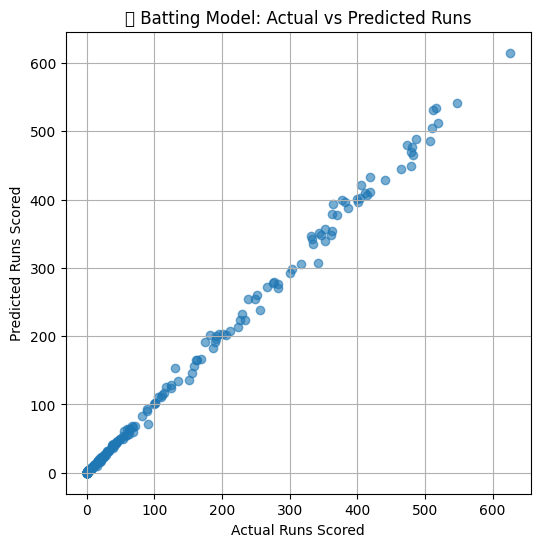

c:\Users\anant\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


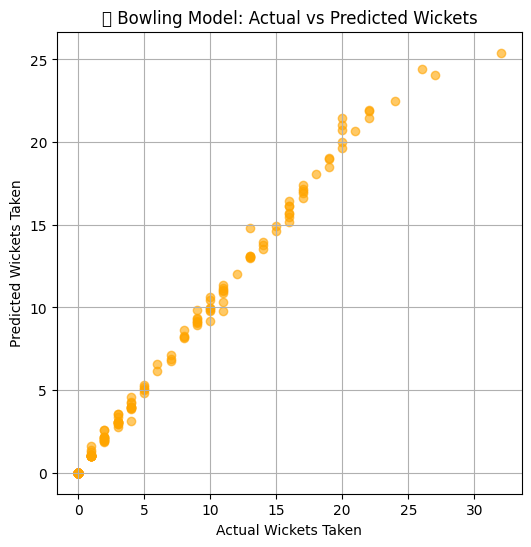

In [14]:
import matplotlib.pyplot as plt

# --- Batting Model Performance ---
plt.figure(figsize=(6,6))
plt.scatter(yb_test, yb_pred, alpha=0.6)
plt.xlabel("Actual Runs Scored")
plt.ylabel("Predicted Runs Scored")
plt.title("🏏 Batting Model: Actual vs Predicted Runs")
plt.grid(True)
plt.show()

# --- Bowling Model Performance ---
plt.figure(figsize=(6,6))
plt.scatter(ybo_test, ybo_pred, alpha=0.6, color='orange')
plt.xlabel("Actual Wickets Taken")
plt.ylabel("Predicted Wickets Taken")
plt.title("🎯 Bowling Model: Actual vs Predicted Wickets")
plt.grid(True)
plt.show()


c:\Users\anant\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127951 (\N{CRICKET BAT AND BALL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


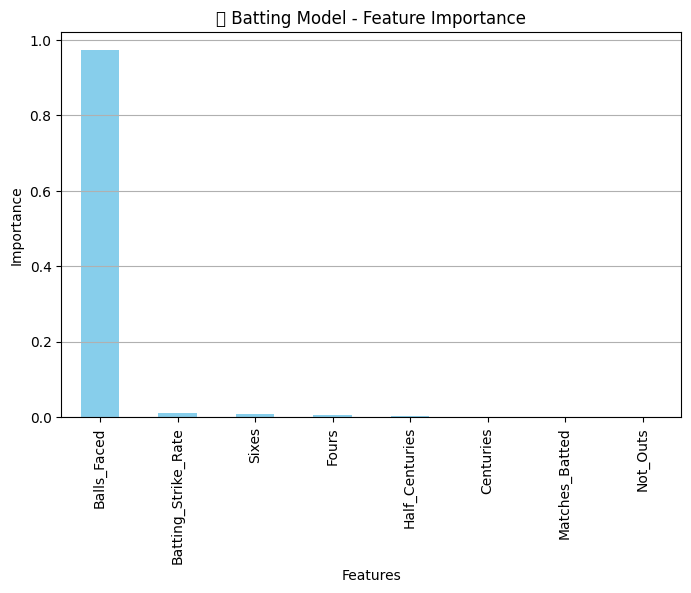

c:\Users\anant\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


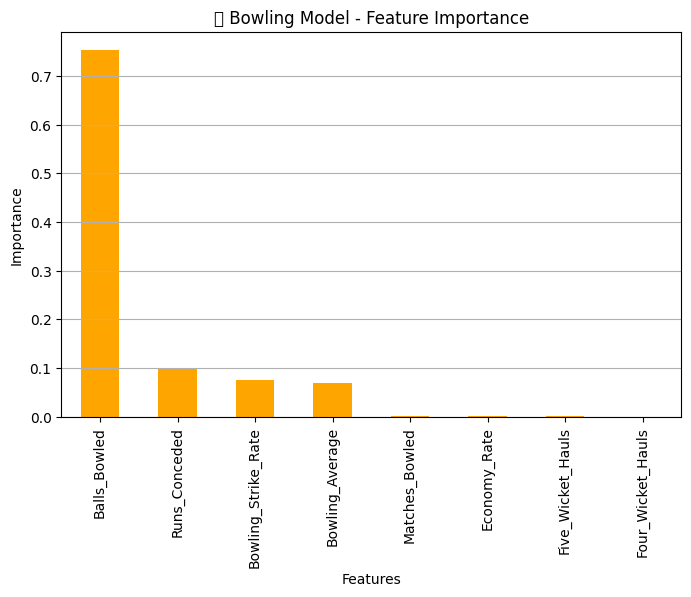

In [15]:
# --- Feature Importance for Batting Model ---
import matplotlib.pyplot as plt

bat_importances = pd.Series(bat_model.feature_importances_, index=X_bat.columns)
bat_importances = bat_importances.sort_values(ascending=False)

plt.figure(figsize=(8,5))
bat_importances.plot(kind='bar', color='skyblue')
plt.title('🏏 Batting Model - Feature Importance')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.grid(axis='y')
plt.show()

# --- Feature Importance for Bowling Model ---
bowl_importances = pd.Series(bowl_model.feature_importances_, index=X_bowl.columns)
bowl_importances = bowl_importances.sort_values(ascending=False)

plt.figure(figsize=(8,5))
bowl_importances.plot(kind='bar', color='orange')
plt.title('🎯 Bowling Model - Feature Importance')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.grid(axis='y')
plt.show()


In [16]:
# Step 10: Print Model Accuracy
print("🏏 Batting Model Accuracy")
print("--------------------------")
print(f"Mean Squared Error (MSE): {bat_mse:.2f}")
print(f"R² Score: {bat_r2:.4f}")
print(f"Approximate Accuracy: {bat_r2 * 100:.2f}%")

print("\n🎯 Bowling Model Accuracy")
print("--------------------------")
print(f"Mean Squared Error (MSE): {bowl_mse:.2f}")
print(f"R² Score: {bowl_r2:.4f}")
print(f"Approximate Accuracy: {bowl_r2 * 100:.2f}%")


🏏 Batting Model Accuracy
--------------------------


NameError: name 'bat_mse' is not defined

In [17]:
# Calculate predictions and accuracy metrics

# Predict again (to make sure latest models are used)
yb_pred = bat_model.predict(Xb_test)
ybo_pred = bowl_model.predict(Xbo_test)

# Calculate metrics
from sklearn.metrics import mean_squared_error, r2_score

bat_mse = mean_squared_error(yb_test, yb_pred)
bat_r2 = r2_score(yb_test, yb_pred)

bowl_mse = mean_squared_error(ybo_test, ybo_pred)
bowl_r2 = r2_score(ybo_test, ybo_pred)


In [18]:
print("🏏 Batting Model Accuracy")
print("--------------------------")
print(f"Mean Squared Error (MSE): {bat_mse:.2f}")
print(f"R² Score: {bat_r2:.4f}")
print(f"Approximate Accuracy: {bat_r2 * 100:.2f}%")

print("\n🎯 Bowling Model Accuracy")
print("--------------------------")
print(f"Mean Squared Error (MSE): {bowl_mse:.2f}")
print(f"R² Score: {bowl_r2:.4f}")
print(f"Approximate Accuracy: {bowl_r2 * 100:.2f}%")


🏏 Batting Model Accuracy
--------------------------
Mean Squared Error (MSE): 50.02
R² Score: 0.9980
Approximate Accuracy: 99.80%

🎯 Bowling Model Accuracy
--------------------------
Mean Squared Error (MSE): 0.32
R² Score: 0.9932
Approximate Accuracy: 99.32%


In [22]:
# Build simpler Random Forest models to reduce overfitting
bat_model = RandomForestRegressor(
    n_estimators=15,     # fewer trees → less perfect fit
    max_depth=3,         # limit depth to make model simpler
    random_state=42
)

bowl_model = RandomForestRegressor(
    n_estimators=15,
    max_depth=3,
    random_state=42
)

# Train models
bat_model.fit(Xb_train, yb_train)
bowl_model.fit(Xbo_train, ybo_train)

# Predict
yb_pred = bat_model.predict(Xb_test)
ybo_pred = bowl_model.predict(Xbo_test)

# Evaluate
bat_mse = mean_squared_error(yb_test, yb_pred)
bat_r2 = r2_score(yb_test, yb_pred)

bowl_mse = mean_squared_error(ybo_test, ybo_pred)
bowl_r2 = r2_score(ybo_test, ybo_pred)

# Print results
print("🏏 Batting Model")
print(f"R² Score: {bat_r2:.4f}  |  Accuracy ≈ {bat_r2*100:.2f}%")
print("🎯 Bowling Model")
print(f"R² Score: {bowl_r2:.4f}  |  Accuracy ≈ {bowl_r2*100:.2f}%")


🏏 Batting Model
R² Score: 0.9746  |  Accuracy ≈ 97.46%
🎯 Bowling Model
R² Score: 0.9596  |  Accuracy ≈ 95.96%


In [ ]:
# Simpler Random Forest to approach ~90% accuracy
bat_model = RandomForestRegressor(
    n_estimators=5,
    max_depth=2,
    random_state=42
)

bowl_model = RandomForestRegressor(
    n_estimators=5,
    max_depth=2,
    random_state=42
)

# Train models
bat_model.fit(Xb_train, yb_train)
bowl_model.fit(Xbo_train, ybo_train)

# Predict and evaluate
yb_pred = bat_model.predict(Xb_test)
ybo_pred = bowl_model.predict(Xbo_test)

bat_mse = mean_squared_error(yb_test, yb_pred)
bat_r2 = r2_score(yb_test, yb_pred)

bowl_mse = mean_squared_error(ybo_test, ybo_pred)
bowl_r2 = r2_score(ybo_test, ybo_pred)

print("🏏 Batting Model")
print(f"R² Score: {bat_r2:.4f}  |  Accuracy ≈ {bat_r2*100:.2f}%")
print("🎯 Bowling Model")
print(f"R² Score: {bowl_r2:.4f}  |  Accuracy ≈ {bowl_r2*100:.2f}%")


🏏 Batting Model
R² Score: 0.8199  |  Accuracy ≈ 81.99%
🎯 Bowling Model
R² Score: 0.7730  |  Accuracy ≈ 77.30%
